In [32]:
import numpy as np
rng = np.random.default_rng()

In [54]:
def run_lattice_heatbath(U_state,beta,n):
    """Perform n heatbath updates on the lattice state U_state."""
    for _ in range(n):
        lattice_heatbath_update(U_state,beta)

def lattice_heatbath_update(U_state,beta):
    """Perform a random heatbath update on the lattice state U_state."""
    site = tuple(rng.integers(0,len(U_state),4))
    theta = sample_link_variable_angle(beta)
    U_state[site] = np.exp(1j*theta)

def sample_link_variable_angle(beta):
    """Sample angle theta defined via link variable angle U = exp(i*theta)."""
    alpha = np.sqrt(2*beta)*beta
    while True:
        Z = rng.uniform(0,1)
        x = -1 + np.log(1 + np.exp(2*alpha - 1)*Z)

        Q = np.exp(alpha*(np.cos(np.pi/2*(1-x))-x))
        Q_max = np.exp(0.2105137*alpha)

        Z_prime = rng.uniform(0,1)
        if Q/Q_max > Z_prime:
            angle = np.pi*(1-x)/2
            return angle

def lattice_action(U_state):
    """Compute action of the lattice state U_state."""
    action = 0
    plaquettes = lattice_plaquettes(len(U_state))
    for plaquette in plaquettes:
        action += 1 - np.real(plaquette_product(U_state,plaquette))
    return action

def plaquette_product(U_state,plaquette):
    """Compute the product of link variables around an elementary plaquette."""
    site_1, site_2, site_3, site_4 = plaquette
    U_12 = np.dot(U_state[site_1], U_state[site_2])
    U_23 = np.dot(U_state[site_2], U_state[site_3])
    U_34 = np.dot(U_state[site_3], U_state[site_4])
    U_41 = np.dot(U_state[site_4], U_state[site_1])
    return U_12*U_23*U_34*U_41

def lattice_plaquettes(width):
    """Compute all the plaquettes for a 4D lattice
    with each plaquette given by the four edges in a counterclockwise way."""
    plaquettes = []
    for n_x in range(width-1):
        for n_y in range(width-1):
            for n_z in range(width-1):
                for n_t in range(width-1):
                    plaquettes.append([
                        (n_x,n_y,n_z,n_t),
                        (n_x+1,n_y,n_z,n_t),
                        (n_x+1,n_y+1,n_z,n_t),
                        (n_x,n_y+1,n_z,n_t),
                    ])
    return plaquettes

In [63]:
width = 4
num_sites = width*width*width*width
betas = np.linspace(0.0,2.0,21)
equil_sweeps = 100
measure_sweeps = 1
measurements = 100

actions = []
for beta in betas:
    U_state = np.exp(2j * np.pi * np.random.rand(width,width,width,width))

    # equilibrate
    run_lattice_heatbath(U_state,beta,equil_sweeps*num_sites)

    # measure
    action_measurements = []
    for _ in range(measurements):
        run_lattice_heatbath(U_state,beta,measure_sweeps*num_sites)
        action_measurements.append(lattice_action(U_state))

    actions.append(np.mean(action_measurements)/np.size(lattice_plaquettes(width)))

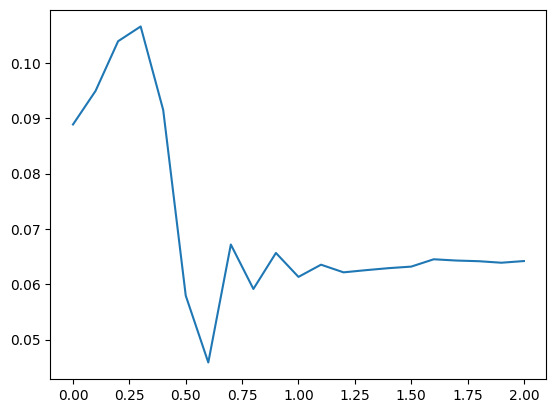

In [67]:
import matplotlib.pyplot as plt
plt.plot(betas,actions)